# Importing libraries and dataset

In [1]:
%pwd

'/home/shekhar/ml_projects/price_prediction/mysite/car/notebooks'

In [2]:
%cd ../..

/home/shekhar/ml_projects/price_prediction/mysite


In [3]:
%pwd

'/home/shekhar/ml_projects/price_prediction/mysite'

In [4]:
%ls

car/        Dockerfile  manage.py*      README.md         setup.py     venv/
config/     laptop/     mysite/         requirements.txt  src/
db.sqlite3  logs/       README_images/  research/         template.py


In [5]:
from src.car.constants import *
from src.car.utils.common import read_yaml, create_directories

ModuleNotFoundError: No module named 'box'

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("car/notebooks/data/CAR DETAILS FROM CAR DEKHO.csv")

In [8]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [14]:
dic = {'a':1, 
      'b': 2,
      'c': 3,
      'd': 8}


In [22]:
cols = list(dic.items())
for c in cols:
    print(c[0], c[1])

a 1
b 2
c 3
d 8


In [20]:
cols[0][1]

1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("data/CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
df.duplicated().sum()

763

In [17]:
cols = ['fuel', 'seller_type', 'transmission', 'owner']

In [15]:
import numpy as np
np.unique(df['fuel'].values)

array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object)

In [23]:
for col in cols:
    counts = df[col].value_counts()
    for i in counts.index:
        if counts[i] < 10:
            print(i)
            df = df[df[col] != i]


Electric


In [24]:
np.unique(df['fuel'].values)

array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object)

In [30]:
counts = df['fuel'].value_counts()

In [35]:
for i in counts.index:
    print(i, counts[i])

Diesel 2153
Petrol 2123
CNG 40
LPG 23
Electric 1


In [9]:
for column in df.columns:
    print(df[column].value_counts())
    print("*"*25)

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64
*************************
2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64
*************************
300000     162
250000     125
350000     122
550000   

# Quality

- No missing value
- need to drop the duplicated rows
- only one Electric car in "fuel" column...need to drop
- extract company name and model name and make new feature from single "Company" column

In [10]:
#dropping duplicate rows
df.drop_duplicates(keep='first', inplace=True)

In [11]:
df = df[df['fuel'] != 'Electric']

# Preprocessing / cleaning

In [27]:
df['name'].apply(lambda x:x.split()[0])

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: name, Length: 4339, dtype: object

In [36]:
(df['name'].apply(lambda x:x.split()[1:3])).str.join(' ')

0          800 AC
1         Wagon R
2       Verna 1.6
3        RediGO T
4        Amaze VX
          ...    
4335    i20 Magna
4336    i20 Magna
4337       800 AC
4338    Creta 1.6
4339     KWID RXT
Name: name, Length: 4339, dtype: object

In [12]:
# arranging company column
df['company'] = df['name'].apply(lambda x:x.split()[0])

#Creating car_model column
df['model'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')


In [13]:
#resetting index
df = df.reset_index(drop=True)

### checking cleaned data

In [14]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company,model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,Maruti 800 AC
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Maruti Wagon R
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Hyundai Verna 1.6
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,Datsun RediGO T
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Honda Amaze VX


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3576 non-null   object
 1   year           3576 non-null   int64 
 2   selling_price  3576 non-null   int64 
 3   km_driven      3576 non-null   int64 
 4   fuel           3576 non-null   object
 5   seller_type    3576 non-null   object
 6   transmission   3576 non-null   object
 7   owner          3576 non-null   object
 8   company        3576 non-null   object
 9   model          3576 non-null   object
dtypes: int64(3), object(7)
memory usage: 279.5+ KB


# Performing EDA

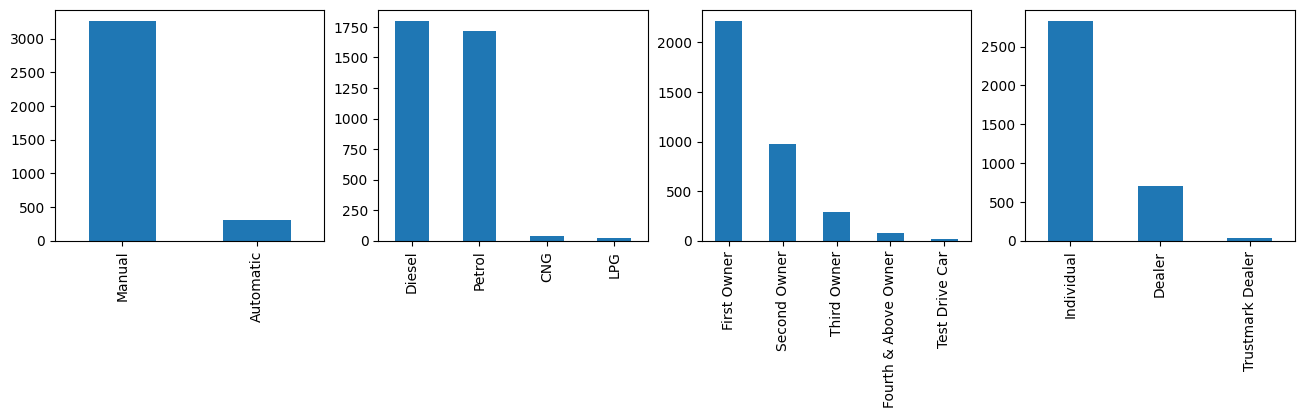

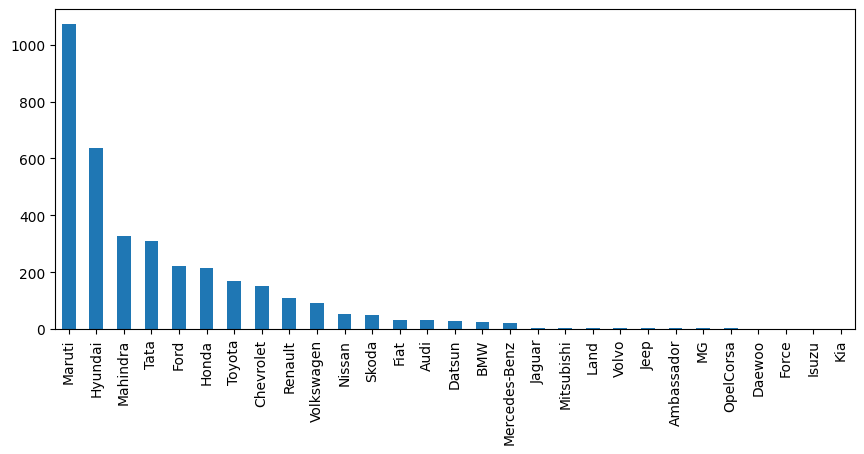

In [16]:
plt.figure(figsize=(16, 3))
plt.subplot(1, 4, 1)
df["transmission"].value_counts().plot(kind='bar')
plt.subplot(1, 4, 2)
df["fuel"].value_counts().plot(kind='bar')
plt.subplot(1, 4, 3)
df["owner"].value_counts().plot(kind='bar')
plt.subplot(1, 4, 4)
df["seller_type"].value_counts().plot(kind='bar')
plt.figure(figsize=(10, 4))
df["company"].value_counts().plot(kind='bar')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)

[]

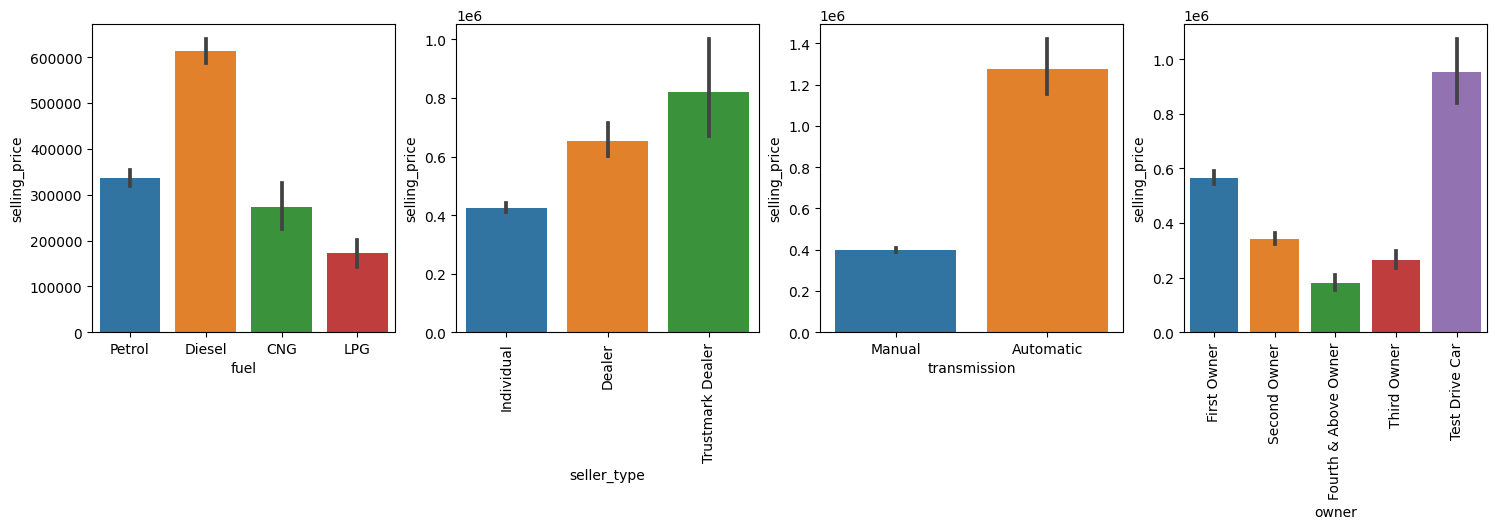

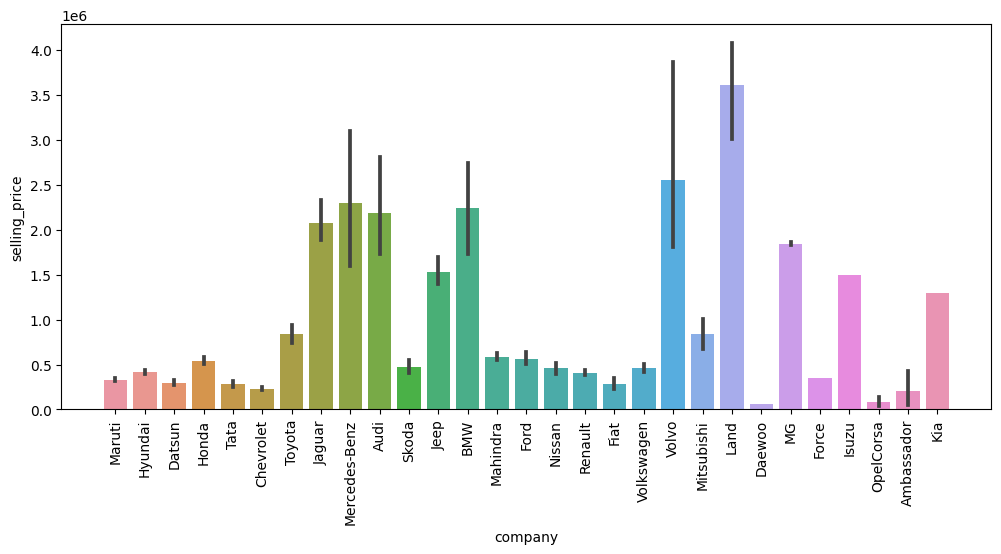

In [17]:
plt.figure(figsize=(18, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=df["fuel"], y=df["selling_price"])
plt.subplot(1, 4, 2)
sns.barplot(x=df["seller_type"], y=df["selling_price"])
plt.xticks(rotation='vertical')
plt.subplot(1, 4, 3)
sns.barplot(x=df["transmission"], y=df["selling_price"])
plt.subplot(1, 4, 4)
sns.barplot(x=df["owner"], y=df["selling_price"])
plt.xticks(rotation='vertical')
plt.figure(figsize=(12, 5))
sns.barplot(x=df["company"], y=df["selling_price"])
plt.xticks(rotation='vertical')
plt.plot()

## Spotting outlier and removing

<Axes: >

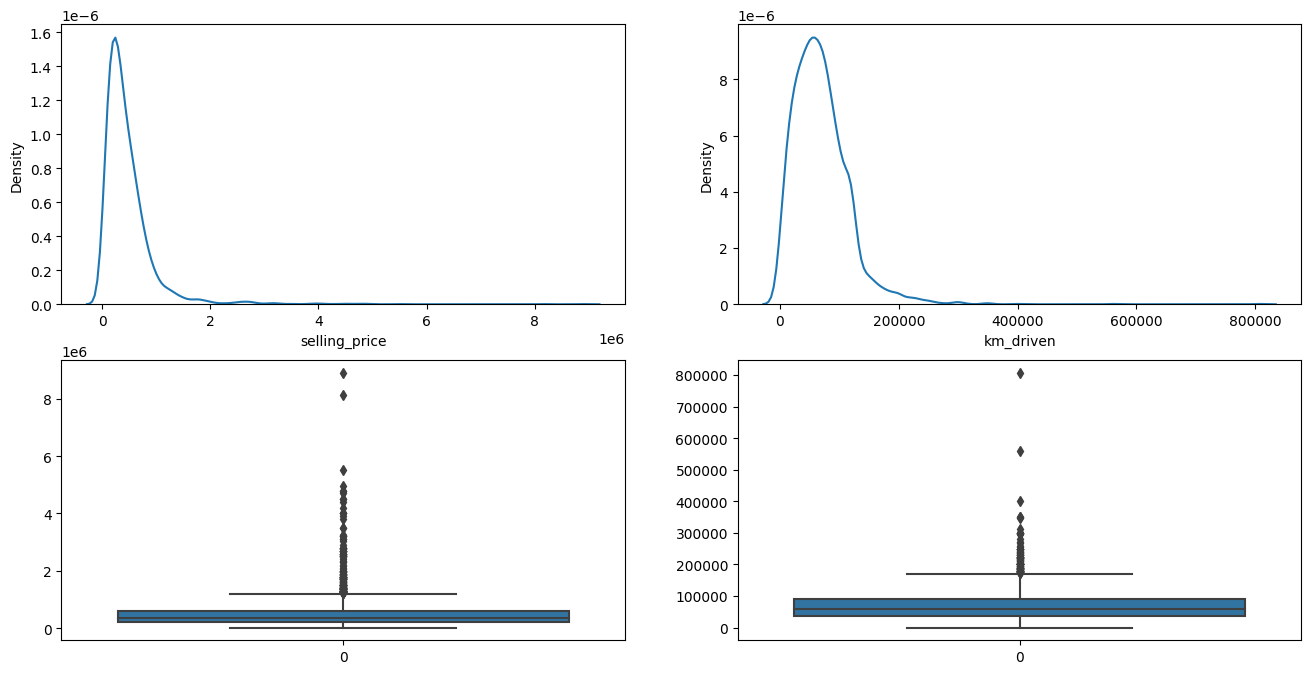

In [17]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.kdeplot(df['selling_price'])
plt.subplot(2, 2, 3)
sns.boxplot(df['selling_price'])
plt.subplot(2, 2, 2)
sns.kdeplot(df['km_driven'])
plt.subplot(2, 2, 4)
sns.boxplot(df['km_driven'])

In [18]:
#Removing outliers from km_driven catagory
q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
iqr_km = q3 - q1
upper_limit = q3 + 1.5*iqr_km
lower_limit = q1 - 1.5*iqr_km
df = df[df['km_driven'] < upper_limit]

#Removing outliers from based on selling price
upper_limit_price = df['selling_price'].quantile(0.99)
lower_limit_price = df['selling_price'].quantile(0.01)

df = df[df['selling_price'] < upper_limit_price]

## finding the best model

In [29]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

#creating train & test data
X = df.drop(columns=['name', 'selling_price'])
y = np.log(df['selling_price'])

models = {'Linear Regression':LinearRegression(),
          'Random Forrest':RandomForestRegressor(),
          'Lasso': Lasso(),
          'SVR':SVR()

}
model_names = []
performances = []
mean = []

for model in tqdm(list(models.keys())):
    # print(model)
    # print(models[model])
    transformer = ColumnTransformer(transformers=[
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['fuel', 'seller_type', 'owner', 'transmission', 'model', 'company']),
        ('scaler', MinMaxScaler(), ['km_driven', 'year'])
                                                ], remainder='passthrough')

    ml_model = models[model]
    pipe = make_pipeline(transformer, ml_model)
    scores = cross_val_score(pipe, X, y, cv = 5, scoring = 'r2')
    model_names.append(model)
    performances.append(scores)
    mean.append(scores.mean())

dic = {'model_name':model_names,
       'r2_scores': performances,
       'mean_r2':mean}

model_performance = pd.DataFrame(dic)


100%|██████████| 4/4 [00:57<00:00, 14.30s/it]


In [30]:
model_performance

,model_name,r2_scores,mean_r2
0,Linear Regression,"[-7.394177510054721e+22, -6.058874738125779e+2...",-2.472508e+23
1,Random Forrest,"[0.8206503717073949, 0.8377352387745987, 0.813...",8.163091e-01
2,Lasso,"[-0.006826608298208914, -0.0002058643160502971...",-7.906709e-03
3,SVR,"[0.8795324582281445, 0.8670379881782921, 0.861...",8.622410e-01


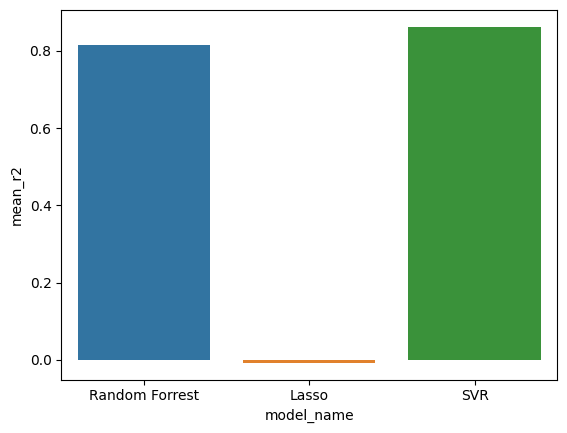

In [34]:
sns.barplot(x=model_performance['model_name'][1:], y = model_performance['mean_r2'][1:])
plt.show()

### Training the best model (SVR)

In [41]:
transformer = ColumnTransformer(transformers=[
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['fuel', 'seller_type', 'owner', 'transmission', 'model', 'company']),
        ('scaler', MinMaxScaler(), ['km_driven', 'year'])
                                                ], remainder='passthrough')

ml_model = SVR()
pipe = make_pipeline(transformer, ml_model)

In [42]:
pipe.fit(X,y)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['fuel', 'seller_type',
                                                   'owner', 'transmission',
                                                   'model', 'company']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['km_driven', 'year'])])),
                ('svr', SVR())])

### making trial predictions

In [51]:
np.exp(pipe.predict(pd.DataFrame(columns=['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'company', 'model'],data=np.array([2012, 1000000, 'Diesel', 'Individual', 'Manual', 'First Owner', 'Hyundai', 'Hyundai Verna 1.6']).reshape(1, 8))))

array([445142.05545645])

### Exporting data and model for deployment purpose

In [53]:
import pickle

df.to_csv("data/clean_car.csv")
pickle.dump(pipe, open('data/model_svr.pkl', 'wb'))
